### Simple Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


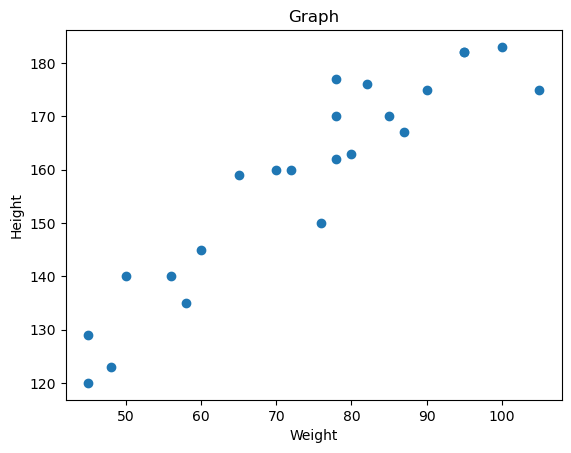

In [4]:
plt.scatter(x = 'Weight', y = "Height" ,data =df )
plt.xlabel("Weight")
plt.ylabel("Height")
plt.title("Graph")
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [7]:
df.isna().sum()

Weight    0
Height    0
dtype: int64

### Divide our dataset into dependent and independent features

In [8]:
X = df[['Weight']]  ##independent Feature
y = df[['Height']]  ##Dependent Feature

In [9]:
X.shape

(23, 1)

In [10]:
y.shape

(23, 1)

#### Further divide the dataset into train and test dataet

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test ,y_train , y_test =  train_test_split(X,y,test_size=0.20,random_state=42)

In [13]:
X_train.head() 

,Weight
12,105
1,58
13,100
5,78
2,48


In [14]:
X_train.shape

(18, 1)

In [15]:
X_test

,Weight
15,78
9,78
0,45
8,95
17,65


In [16]:
X_test.shape

(5, 1)

In [17]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


#### Apply standardization operation so that our regression model gets optimised

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scalar = StandardScaler()

In [20]:
#Note that we do not fit_and transform X_test 
#we just transform it
X_train = scalar.fit_transform(X_train)

In [21]:
X_test = scalar.transform(X_test)

In [22]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

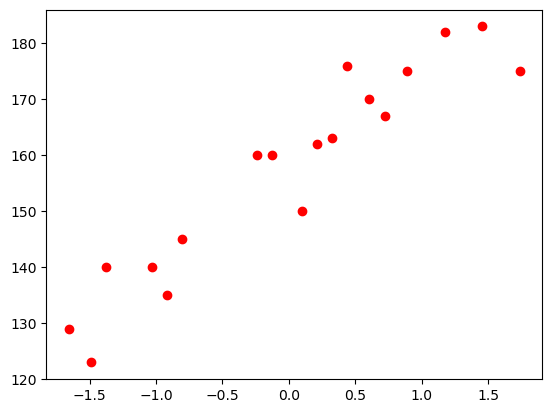

In [23]:
plt.scatter(x = X_train , y = y_train , c = 'r' )

In [24]:
scalar.transform([[70]]) ##if we check new inputs

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.24184557]])

In [25]:
### Model Training

from sklearn.linear_model import LinearRegression

In [26]:
regressor = LinearRegression()

In [27]:
## Training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [28]:
regressor.intercept_

array([157.5])

In [29]:
regressor.coef_

array([[17.03440872]])

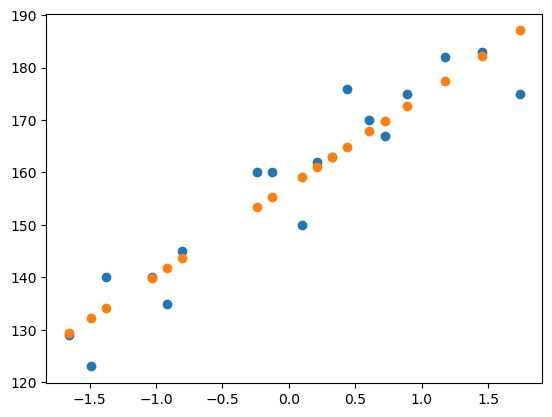

In [30]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train))

In [31]:
regressor.predict(X_train)

array([[187.0869102 ],
       [141.82375282],
       [182.27168069],
       [161.08467086],
       [132.19329381],
       [177.45645118],
       [129.3041561 ],
       [143.74984463],
       [153.38030364],
       [159.15857905],
       [134.11938561],
       [139.89766102],
       [155.30639545],
       [172.64122168],
       [164.93685446],
       [167.82599217],
       [169.75208397],
       [163.01076266]])

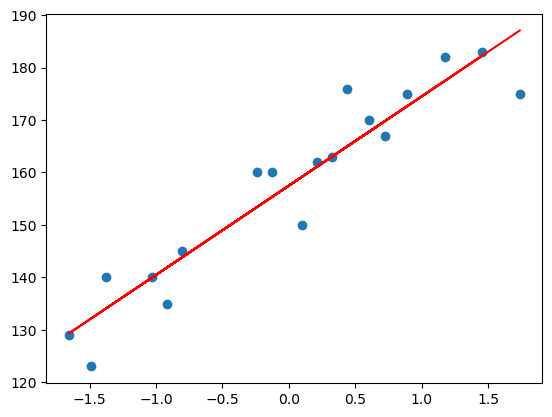

In [32]:
plt.scatter(x =X_train,y =y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

### prediction of train data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_train =157.5 + 17.03(X_train)
### prediction of test data
1.predicted height output= intercept +coef_(Weights)
2.y_pred_test =157.5 + 17.03(X_test)

In [33]:
## Prediction for the test data
y_pred_test = regressor.predict(X_test)

In [34]:
y_pred_test

array([[161.08467086],
       [161.08467086],
       [129.3041561 ],
       [177.45645118],
       [148.56507414]])

In [35]:
y_test

,Height
15,177
9,170
0,120
8,182
17,159


### Performance Metrics MAE,MSE,RMSE

In [36]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [37]:
mse = mean_squared_error(y_test,y_pred_test)

In [38]:
mae =mean_absolute_error(y_test,y_pred_test)

In [39]:
rmse = np.sqrt(mse)

In [40]:
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [41]:
from sklearn.metrics import r2_score

In [42]:
score = r2_score(y_test,y_pred_test)

In [43]:
score    #77 percent accuracy

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

#display adjusted  R squared
1 - ((1-R^2) * (n-1) / (n-k-1))

In [44]:
#display adjusted  R squared
1 - ((1-score) * (len(y_test)-1) / (len(y_test)-X_test.shape[1]-1))

0.7026493147231252

In [45]:
X_test.shape

(5, 1)

In [46]:
scalar

StandardScaler()

In [47]:
regressor

LinearRegression()

In [49]:
len(y_test)

5

In [51]:
X_test.shape

(5, 1)